In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from joblib import load

In [2]:
data_bs1 = pd.read_csv('../data/preprocessed_data_BS1.csv')
data_bs1.head()

,hg38_ASF1A,hg38_CCT7,hg38_EPOR,hg38_NECAP2,hg38_LRRC8A,hg38_NDUFS8,hg38_MRPL22,hg38_HIST1H2BC,hg38_LY96,hg38_UBE2E2-AS1,...,hg38_TMEM128,hg38_ASPSCR1,hg38_CDC20,hg38_DNAJB9,hg38_OSTM1,hg38_LCNL1,hg38_PHB,hg38_LRRC29,hg38_ZFP36,Group
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
1,0,0,0,3,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,0,0,2,0,3,B
3,0,0,0,0,0,3,0,0,0,0,...,0,0,0,3,0,0,3,0,0,B
4,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,B


In [3]:
X = data_bs1.drop(['Group'], axis=1)
y = data_bs1['Group']

In [4]:
y.unique()

array(['B', 'D', 'M', 'NK', 'T'], dtype=object)

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55)

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [7]:
def model_info(y_real, y_pred, labels=['B', 'D', 'M', 'NK', 'T']):
    cm = confusion_matrix(y_real, y_pred)
    class_sums = cm.sum(axis=1)
    normalized_conf_matrix = cm / class_sums[:, np.newaxis]
    sns.heatmap(normalized_conf_matrix, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels, fmt='.2f')
    plt.xlabel('Predvidjene vrednosti')
    plt.ylabel('Stvarne vrednosti')
    plt.title('Matrica konfuzije')
    plt.show()

    print('Matrica konfuzije: \n', cm)
    print('Accuracy score: ', accuracy_score(y_real, y_pred))
    print('Precision score: ', precision_score(y_real, y_pred, average='weighted', zero_division=0))
    print('Recall score: ', recall_score(y_real, y_pred, average='weighted'))
    print('F1 score: ', f1_score(y_real, y_pred, average='weighted'))

In [8]:
def build_model(model, X_train, X_test, y_train, y_test, classes=['B', 'D', 'M', 'NK', 'T']):
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    model_info(y_test, y_pred, classes)

    return model

In [9]:
from sklearn.ensemble import RandomForestClassifier

model_bs1 = RandomForestClassifier(n_estimators=100, random_state=55)

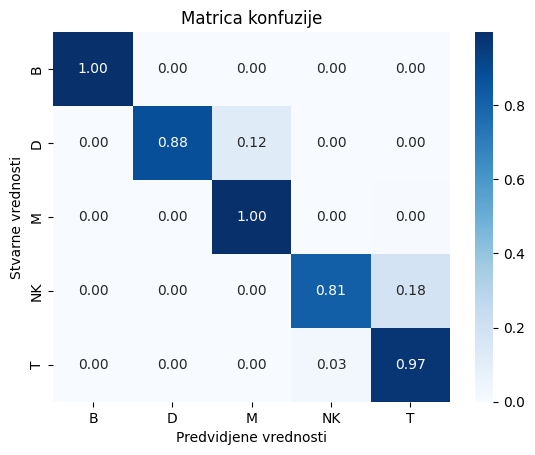

Matrica konfuzije: 
 [[ 516    1    1    0    0]
 [   0   36    5    0    0]
 [   0    0  494    0    2]
 [   1    0    0  319   72]
 [   2    0    1   71 2434]]
Accuracy score:  0.9605562579013907
Precision score:  0.9604559873461571
Recall score:  0.9605562579013907
F1 score:  0.9604771148235505


In [10]:
model_bs1 = build_model(model_bs1, X_train, X_test, y_train, y_test)

In [11]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators': [200, 300],
    'max_depth': [None, 15, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

model = RandomForestClassifier(criterion='entropy', random_state=55)
grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='accuracy', cv=3, verbose=2)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  11.3s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  16.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  17.0s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  17.1s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=  11.1s
[CV] END ma

RandomForestClassifier(max_depth=15, min_samples_split=5, n_estimators=300)

In [12]:
best_params, best_score

({'max_depth': 15,
  'min_samples_leaf': 1,
  'min_samples_split': 5,
  'n_estimators': 300},
 0.9543779800606847)

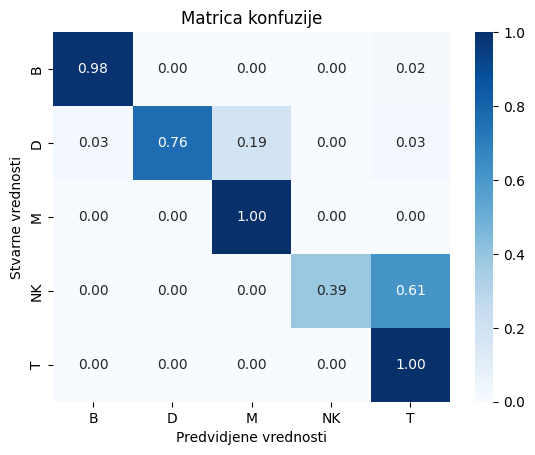

Matrica konfuzije: 
 [[ 582    0    0    0    9]
 [   2   61   15    0    2]
 [   0    0  596    0    0]
 [   0    0    0  104  166]
 [   0    0    1    0 2106]]
Accuracy score:  0.9464873765093305
Precision score:  0.9503401568963294
Recall score:  0.9464873765093305
F1 score:  0.9370256832081164

--------------------------------------



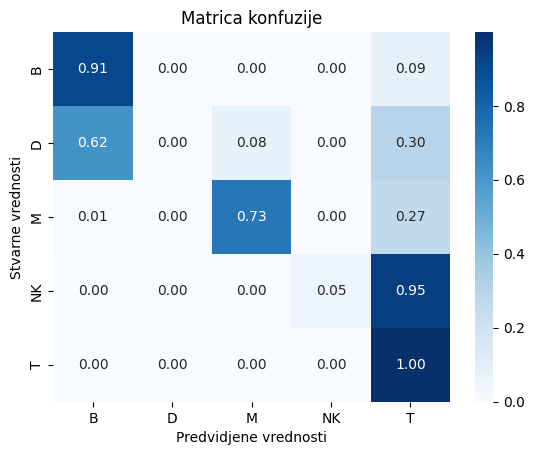

Matrica konfuzije: 
 [[1713    0    0    0  164]
 [ 167    0   22    0   81]
 [  13    0 1459    0  534]
 [   0    0    0   46  796]
 [   4    0    0    2 7145]]
Accuracy score:  0.8532027004775234
Precision score:  0.851099079171363
Recall score:  0.8532027004775234
F1 score:  0.8157644229453747


In [13]:
data_bs2 = pd.read_csv('../data/preprocessed_data_BS2.csv')

X = data_bs2.drop(['Group'], axis=1)
y = data_bs2['Group']

X_train_bs2, X_test_bs2, y_train_bs2, y_test_bs2 = train_test_split(X, y, test_size=0.3, random_state=55)

model_bs2 = RandomForestClassifier(**best_params, criterion='entropy', random_state=55)
model_bs2 = build_model(model_bs2, X_train_bs2, X_test_bs2, y_train_bs2, y_test_bs2)
print('\n--------------------------------------\n')

y_pred = best_model.predict(X)
model_info(y, y_pred)

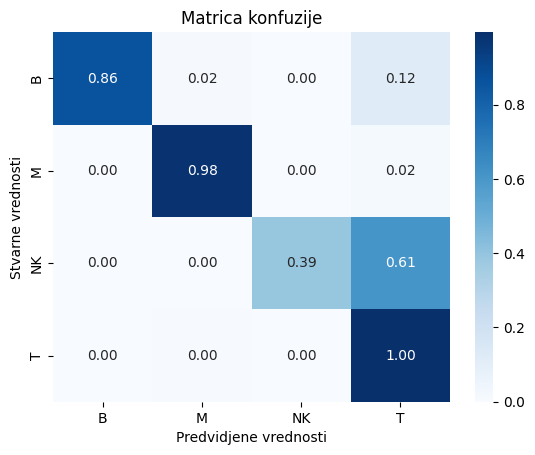

Matrica konfuzije: 
 [[ 446    8    0   62]
 [   0  258    0    5]
 [   0    0   31   48]
 [   1   17    0 4046]]
Accuracy score:  0.9713531084924827
Precision score:  0.9722253693593421
Recall score:  0.9713531084924827
F1 score:  0.9689795540204605

--------------------------------------



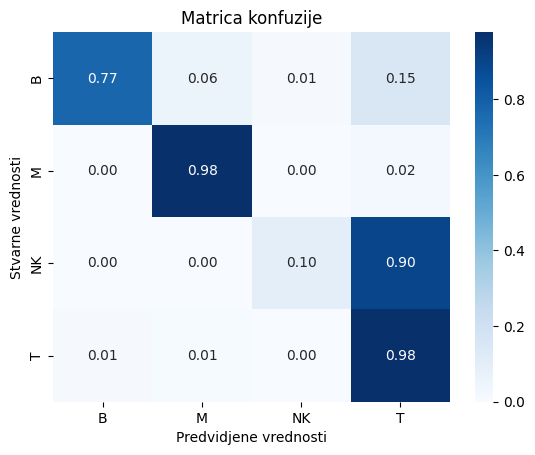

Matrica konfuzije: 
 [[ 1360   103    25   268]
 [    3   835     0    18]
 [    0     0    31   278]
 [  173   108    21 13182]]
Accuracy score:  0.939225845778726
Precision score:  0.9322323142208868
Recall score:  0.939225845778726
F1 score:  0.9330858359759505


In [14]:
data_geo = pd.read_csv('../data/preprocessed_data_GEO.csv')

X = data_geo.drop(['Group'], axis=1)
y = data_geo['Group']

X_train_geo, X_test_geo, y_train_geo, y_test_geo = train_test_split(X, y, test_size=0.3, random_state=55)

model_geo = RandomForestClassifier(**best_params, criterion='entropy', random_state=55)
model_geo = build_model(model_geo, X_train_geo, X_test_geo, y_train_geo, y_test_geo, classes=['B', 'M', 'NK', 'T'])
print('\n--------------------------------------\n')

y_pred = best_model.predict(X)
model_info(y, y_pred, labels=['B', 'M', 'NK', 'T'])

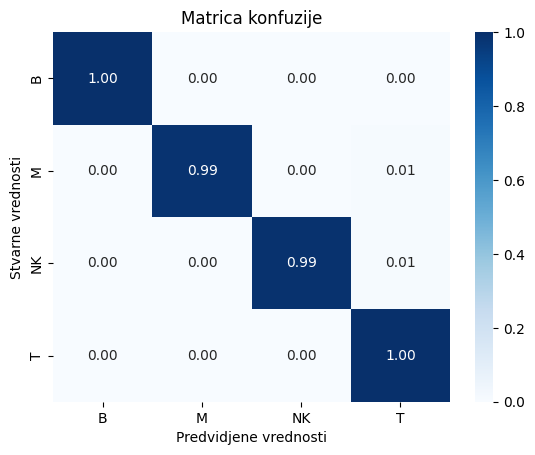

Matrica konfuzije: 
 [[ 2951     0     0     0]
 [    2   530     0     5]
 [    0     1  2395    21]
 [    3     2     2 18817]]
Accuracy score:  0.9985442193376198
Precision score:  0.998544036249328
Recall score:  0.9985442193376198
F1 score:  0.9985418695818286

--------------------------------------



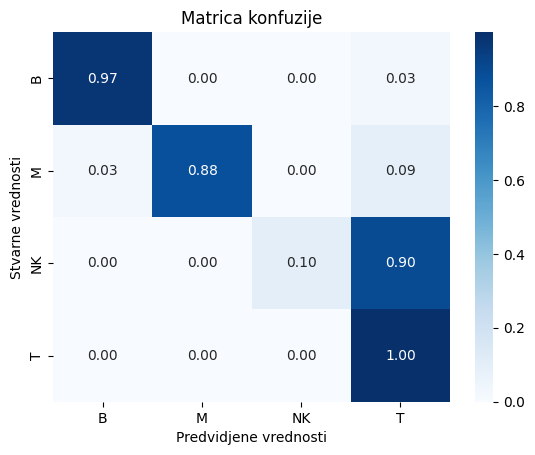

Matrica konfuzije: 
 [[ 9457     0     0   268]
 [   59  1617     0   172]
 [    0     0   855  7324]
 [   32     1     1 62642]]
Accuracy score:  0.9046804483913233
Precision score:  0.9148959014596477
Recall score:  0.9046804483913233
F1 score:  0.8713012002027559


In [15]:
data_10x = pd.read_csv('../data/preprocessed_data_10x.csv')

X = data_10x.drop(['Group'], axis=1)
y = data_10x['Group']

X_train_10x, X_test_10x, y_train_10x, y_test_10x = train_test_split(X, y, test_size=0.3, random_state=55)

model_10x = RandomForestClassifier(**best_params, criterion='entropy', random_state=55)
model_10x = build_model(model_10x, X_train_10x, X_test_10x, y_train_10x, y_test_10x, classes=['B', 'M', 'NK', 'T'])
print('\n--------------------------------------\n')

y_pred = best_model.predict(X)
model_info(y, y_pred, labels=['B', 'M', 'NK', 'T'])